In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df=pd.read_csv('data\medical_insurance.csv')

In [8]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       2772 non-null   int64  
 1   sex       2772 non-null   object 
 2   bmi       2772 non-null   float64
 3   children  2772 non-null   int64  
 4   smoker    2772 non-null   object 
 5   region    2772 non-null   object 
 6   charges   2772 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 151.7+ KB


In [25]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [26]:
cat_cols=df.select_dtypes(include=['object']).columns
num_cols=df.select_dtypes(exclude=['object']).columns

print("Categorical Columns:", cat_cols)
print("Numerical Columns:", num_cols)

Categorical Columns: Index(['sex', 'smoker', 'region'], dtype='object')
Numerical Columns: Index(['age', 'bmi', 'children', 'charges'], dtype='object')


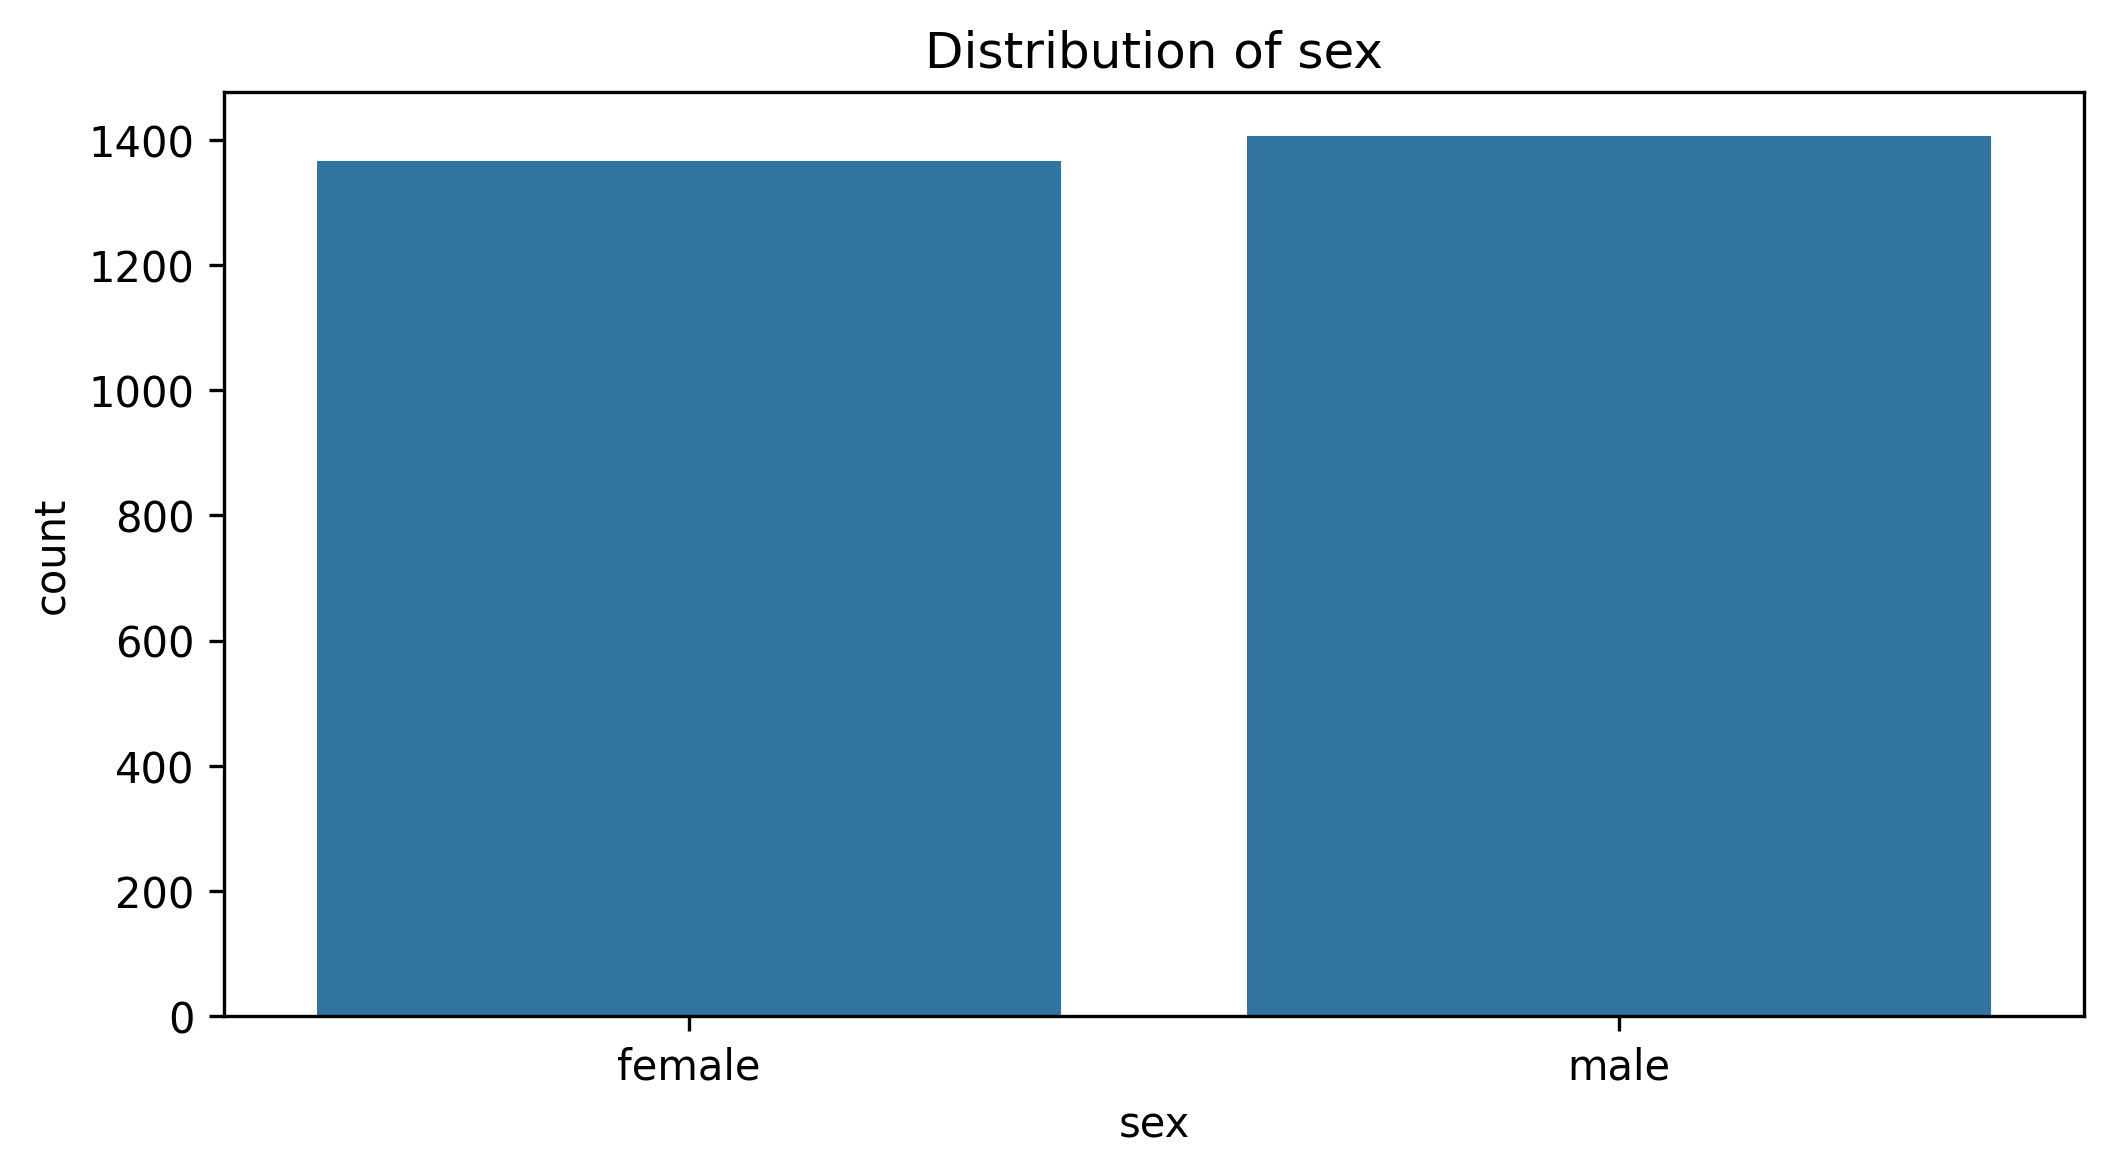

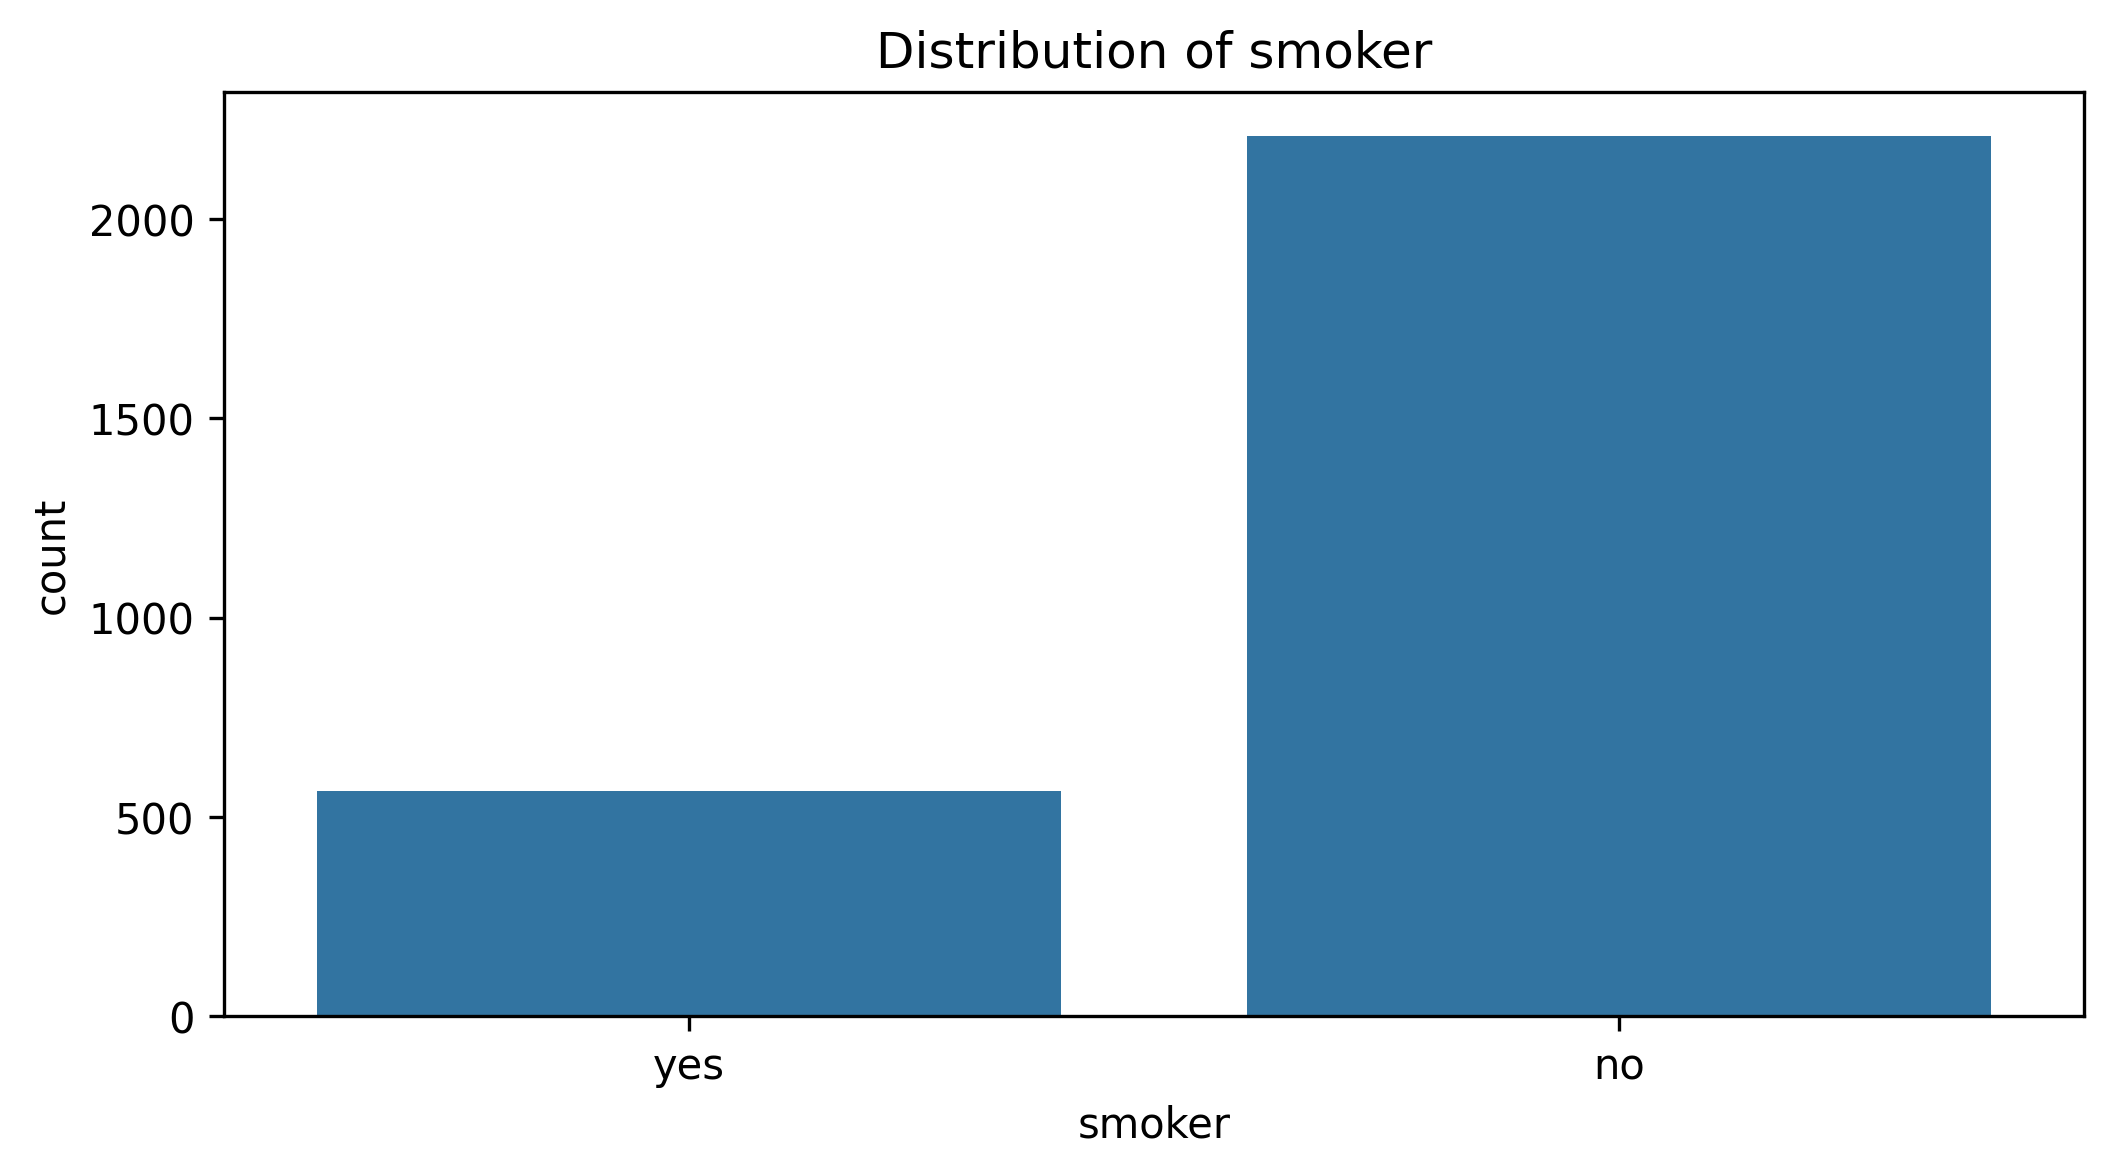

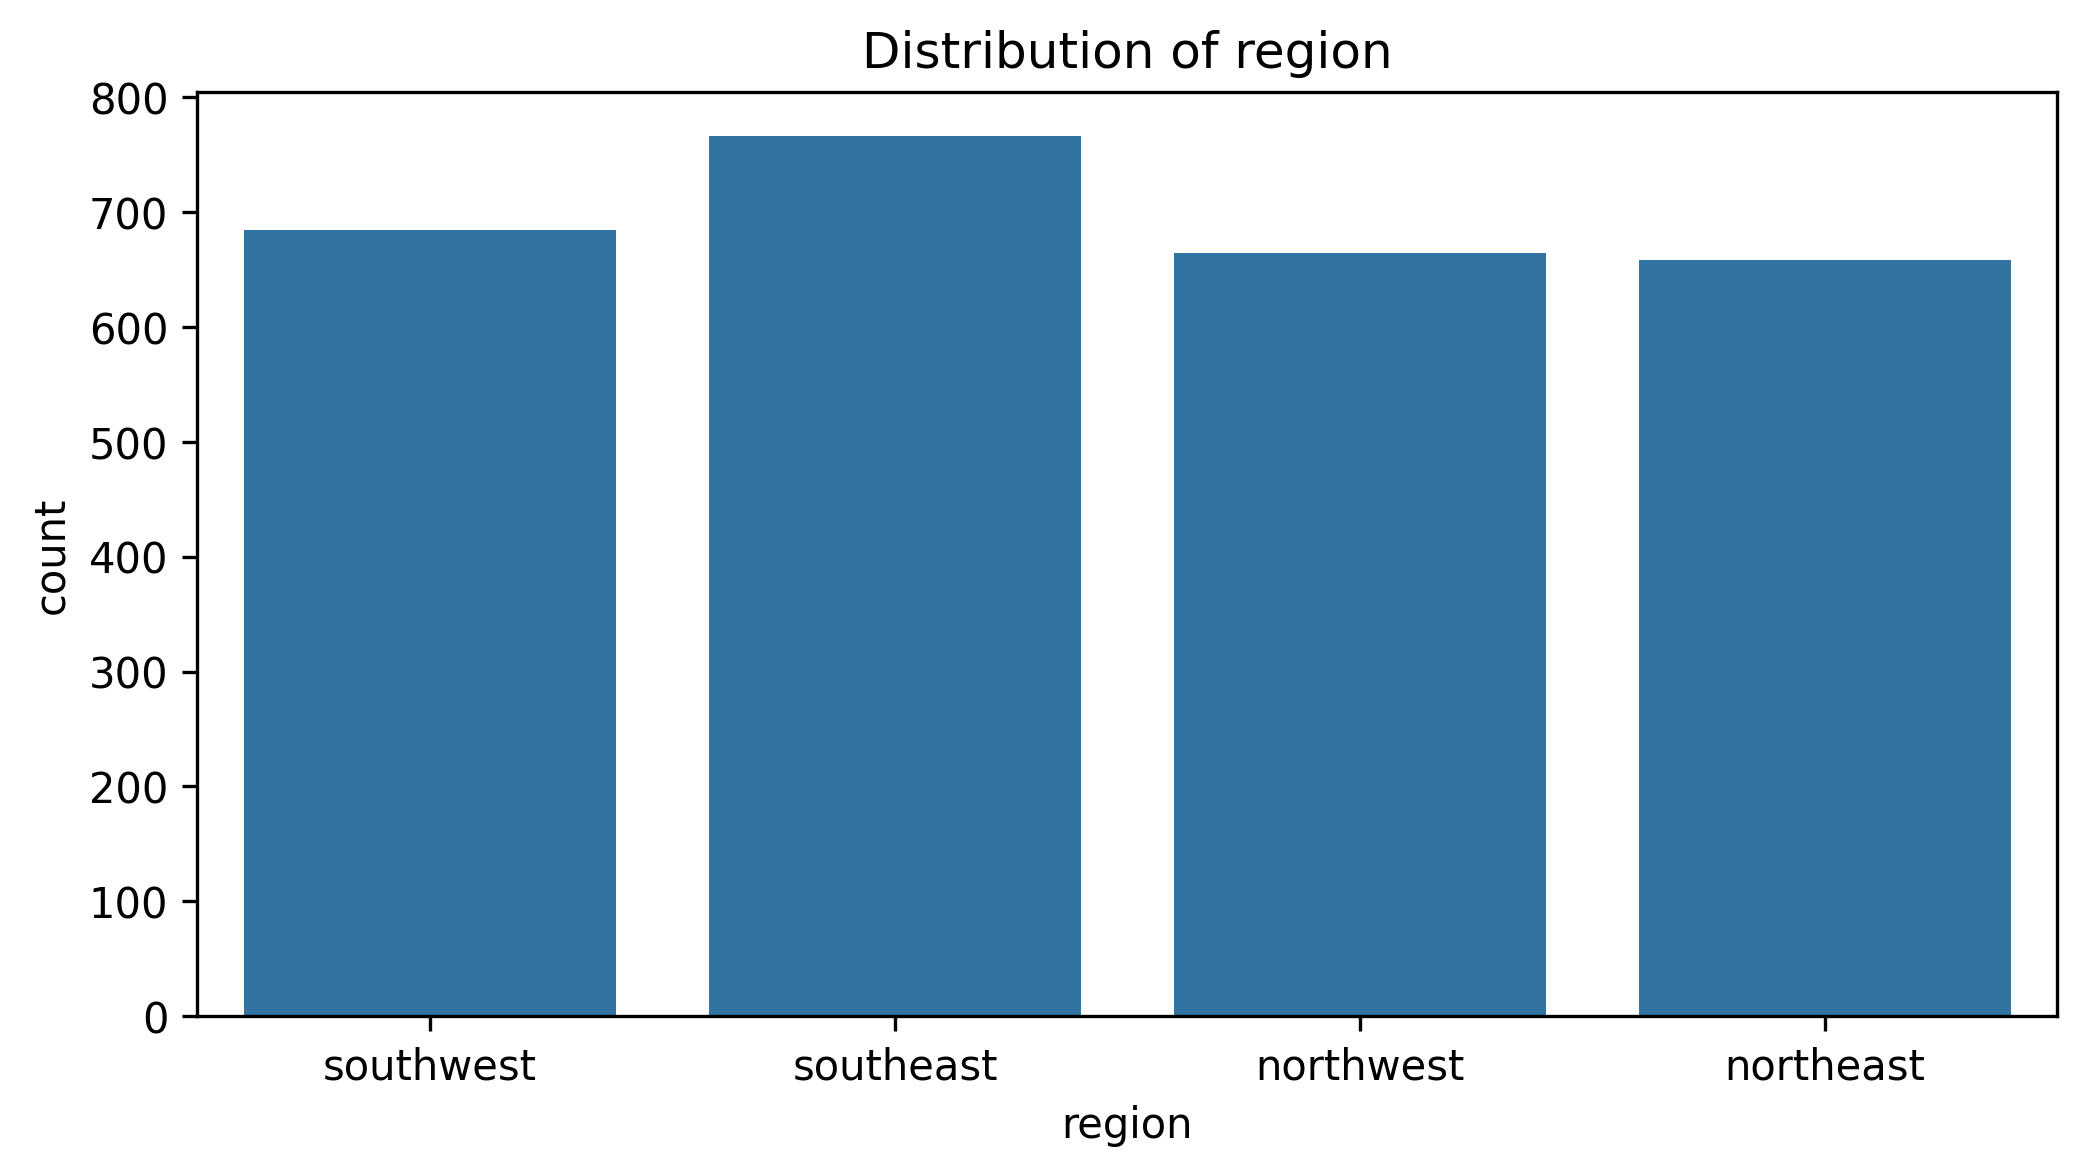

In [27]:
for col in cat_cols:
    plt.figure(figsize=(8,4),dpi=300)
    sns.countplot(data=df, x=col)
    plt.title(f'Distribution of {col}')
    plt.show()


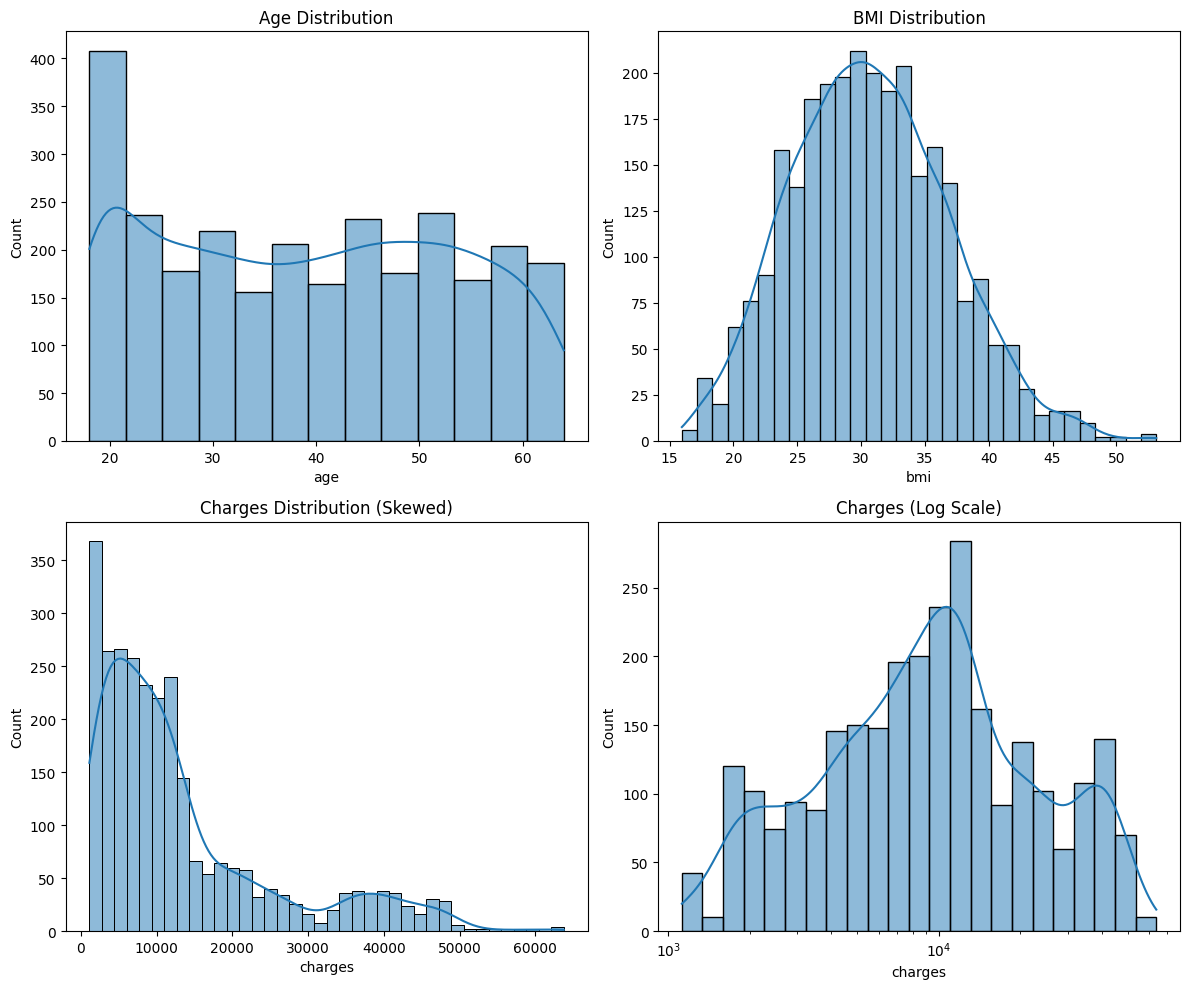

In [29]:
# Distribution of the target variable (highly skewed)
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Age distribution
sns.histplot(data=df, x='age', kde=True, ax=axes[0,0])
axes[0,0].set_title('Age Distribution')

# BMI distribution
sns.histplot(data=df, x='bmi', kde=True, ax=axes[0,1])
axes[0,1].set_title('BMI Distribution')

# Charges distribution (note the extreme skew)
sns.histplot(data=df, x='charges', kde=True, ax=axes[1,0])
axes[1,0].set_title('Charges Distribution (Skewed)')

# Log-transformed charges for better visualization
sns.histplot(data=df, x='charges', kde=True, log_scale=True, ax=axes[1,1])
axes[1,1].set_title('Charges (Log Scale)')

plt.tight_layout()
plt.show()

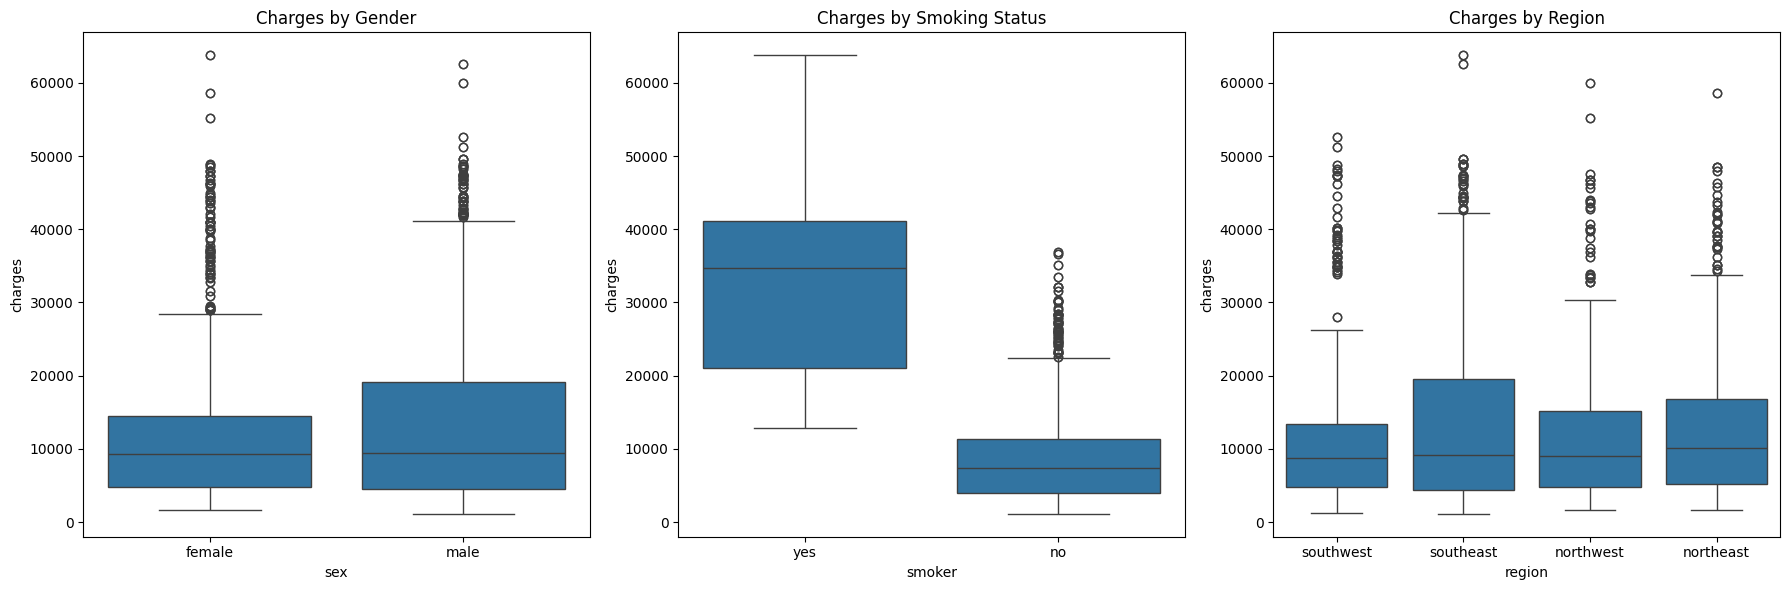

In [30]:
# Box plots for categorical features vs charges
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

sns.boxplot(data=df, x='sex', y='charges', ax=axes[0])
axes[0].set_title('Charges by Gender')

sns.boxplot(data=df, x='smoker', y='charges', ax=axes[1])
axes[1].set_title('Charges by Smoking Status')

sns.boxplot(data=df, x='region', y='charges', ax=axes[2])
axes[2].set_title('Charges by Region')

plt.tight_layout()
plt.show()

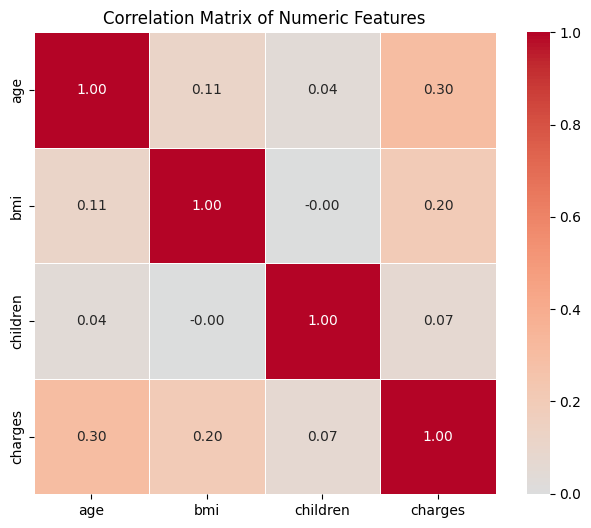

In [32]:
# Select numeric columns and create correlation matrix
numeric_cols = ['age', 'bmi', 'children', 'charges']
corr_matrix = df[numeric_cols].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Numeric Features')
plt.show()

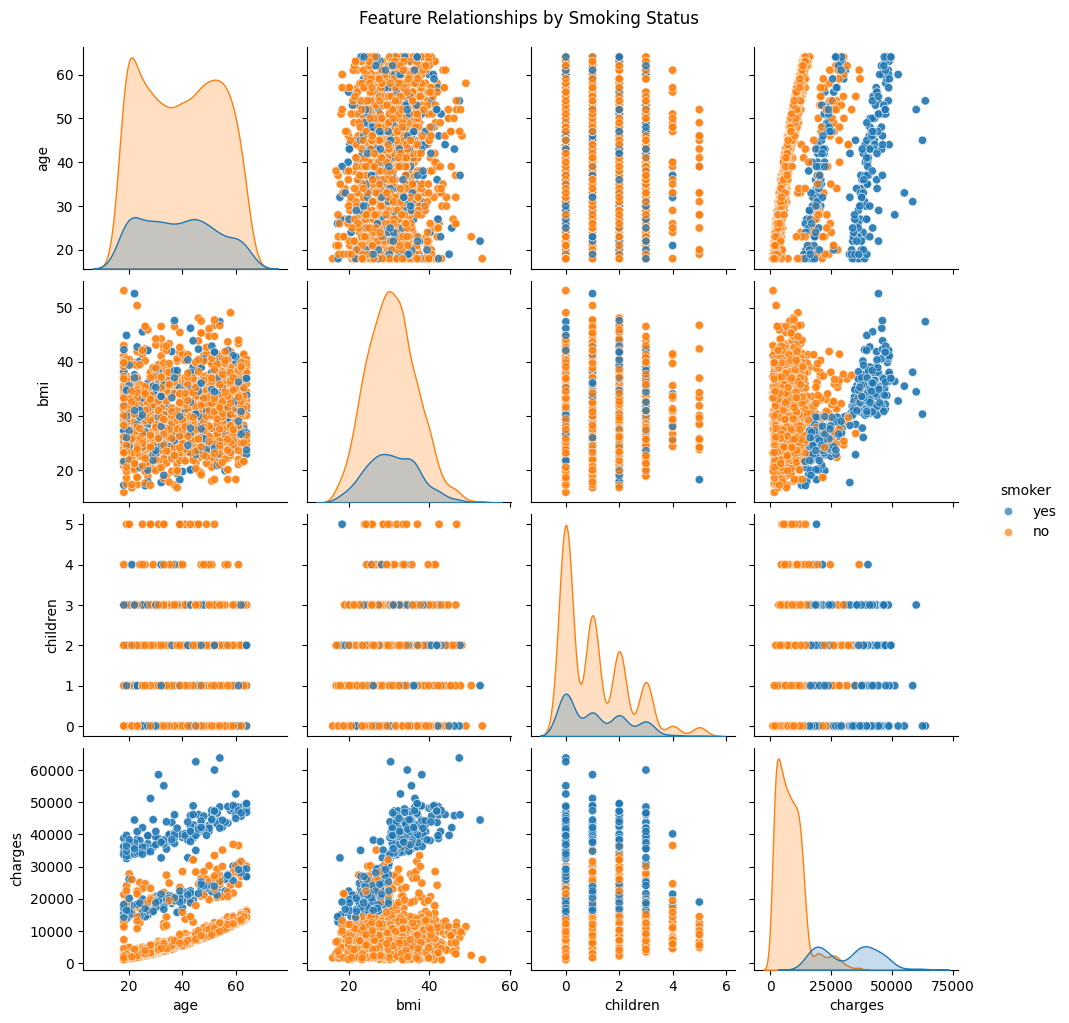

In [33]:
# Pairwise relationships colored by smoking status
sns.pairplot(df, hue='smoker', vars=['age', 'bmi', 'children', 'charges'],
             diag_kind='kde', plot_kws={'alpha': 0.7})
plt.suptitle('Feature Relationships by Smoking Status', y=1.02)
plt.show()

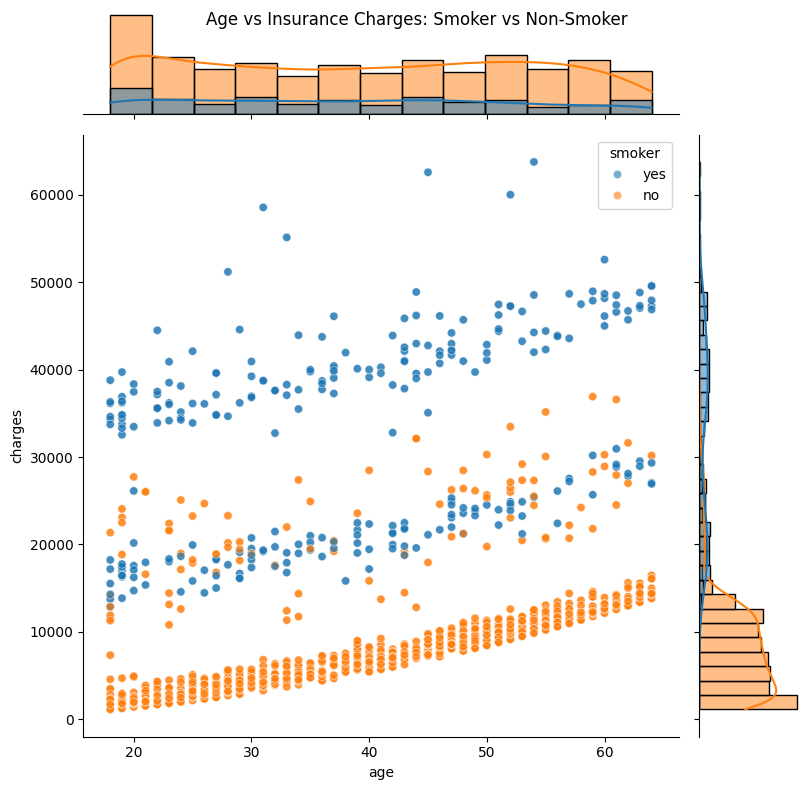

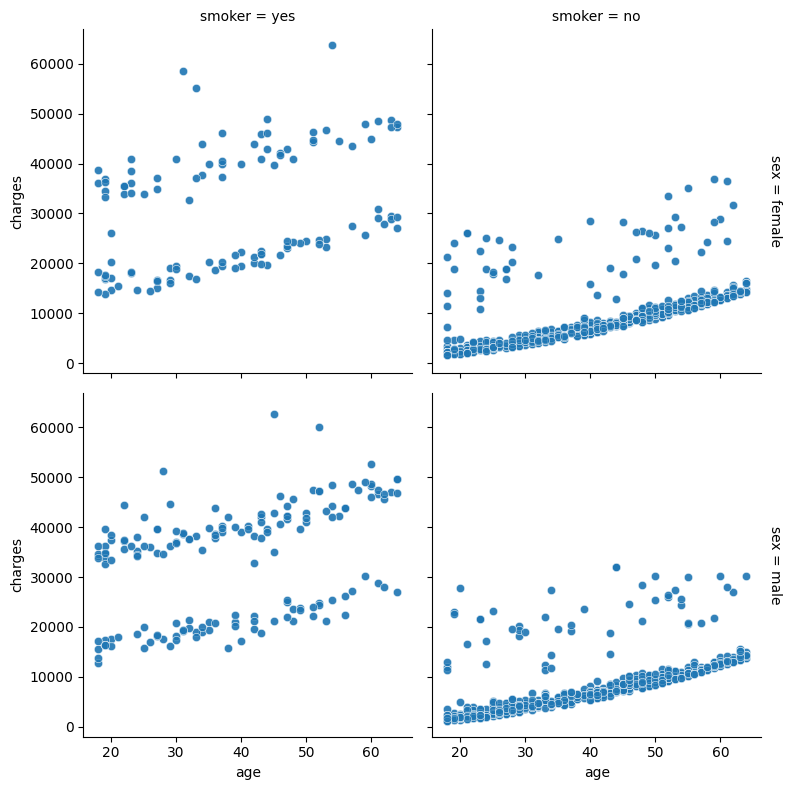

In [ ]:
# Joint plot showing age vs charges, faceted by smoker
g = sns.JointGrid(data=df, x='age', y='charges', hue='smoker', height=8)
g.plot_joint(sns.scatterplot, alpha=0.6)
g.plot_marginals(sns.histplot, kde=True)
g.fig.suptitle('Age vs Insurance Charges: Smoker vs Non-Smoker')
plt.show()

#FacetGrid for more detail
g = sns.FacetGrid(df, col='smoker', row='sex', margin_titles=True, height=4)
g.map(sns.scatterplot, 'age', 'charges', alpha=0.7)
g.add_legend()
plt.show()

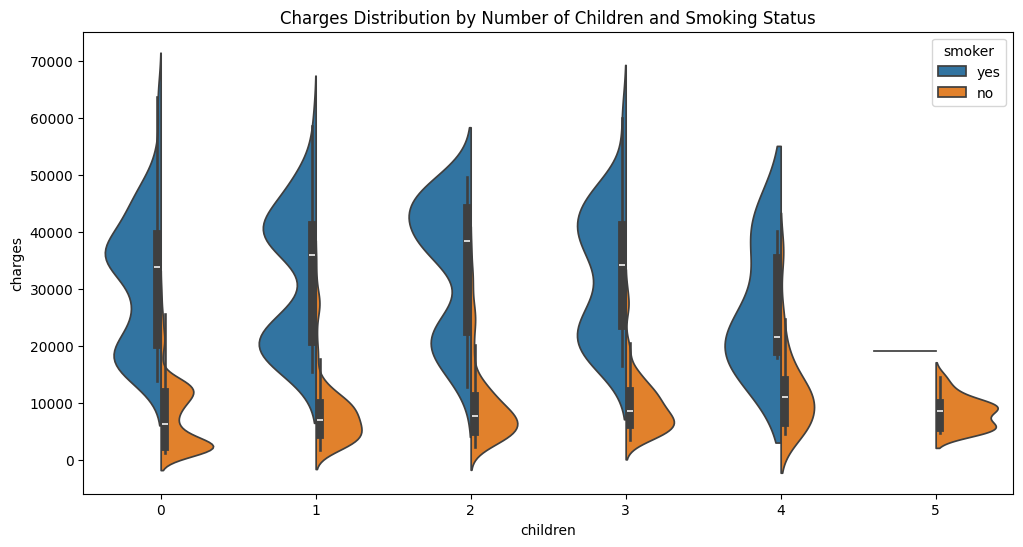

In [35]:
plt.figure(figsize=(12, 6))
sns.violinplot(data=df, x='children', y='charges', hue='smoker', split=True)
plt.title('Charges Distribution by Number of Children and Smoking Status')
plt.show()

Text(0.5, 1.0, 'Proportion of Regions in Dataset')

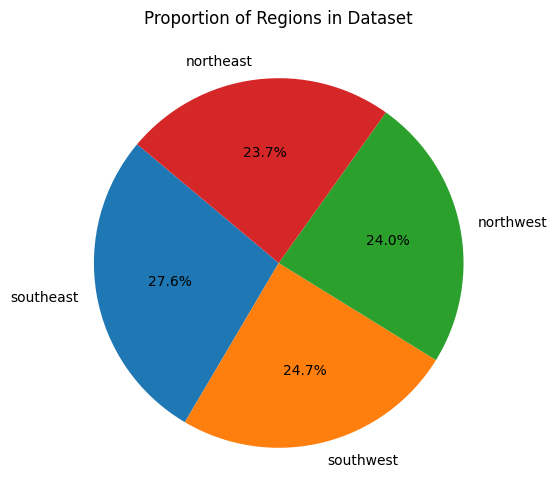

In [36]:
plt.figure(figsize=(10, 6))
plt.pie(df['region'].value_counts(), labels=df['region'].value_counts().index, autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Regions in Dataset')

Text(0.5, 1.0, 'Sex Distribution in Dataset')

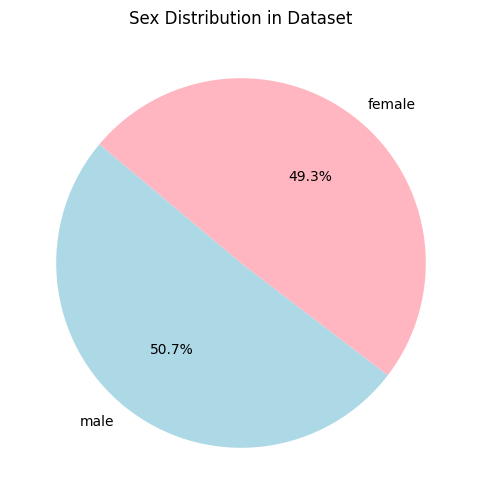

In [43]:
plt.figure(figsize=(10, 6))
plt.pie(df['sex'].value_counts(), labels=df['sex'].value_counts().index, autopct='%1.1f%%', startangle=140,colors=['lightblue','lightpink'])
plt.title('Sex Distribution in Dataset')

In [45]:
import plotly.graph_objects as go

# Calculate average charges grouped by number of children
# Also get count for additional context in hover
avg_charges_by_children = df.groupby('children')['charges'].agg(['mean', 'count']).reset_index()
avg_charges_by_children.columns = ['children', 'avg_charges', 'sample_count']

# Create interactive bar chart
fig = go.Figure(data=[
    go.Bar(
        x=avg_charges_by_children['children'],
        y=avg_charges_by_children['avg_charges'],
        marker_color='rgba(70, 130, 180, 0.7)',  # Steel blue color
        marker_line_color='rgba(70, 130, 180, 1.0)',
        marker_line_width=1.5,
        hovertemplate=(
            '<b>Number of Children:</b> %{x}<br>'
            '<b>Average Charges:</b> $%{y:,.2f}<br>'
            '<b>Sample Size:</b> %{customdata} people<br>'
            '<extra></extra>'
        ),
        customdata=avg_charges_by_children['sample_count']
    )
])

# Update layout with proper formatting
fig.update_layout(
    title={
        'text': 'Average Insurance Charges by Number of Children',
        'x': 0.5,
        'xanchor': 'center',
        'font': {'size': 20}
    },
    xaxis_title='Number of Children',
    yaxis_title='Average Charges ($)',
    xaxis=dict(
        tickmode='linear',
        tick0=0,
        dtick=1  # Show integer ticks for number of children
    ),
    yaxis=dict(
        tickformat='$,.0f'  # Format y-axis as currency
    ),
    hovermode='x unified',
    template='plotly_white',  # Clean template
    width=800,
    height=500
)

# Show the interactive plot
fig.show()

# Optional: Save as HTML file for sharing
# fig.write_html('avg_charges_by_children.html')